Zadanie 1

In [1]:
import random
import matplotlib.pyplot as plt

def rzut():
    x = random.random()
    if x > 0.5:
        return "O"
    else:
        return "R"

In [2]:
#zadanie 1.1

def gra1(l_rzutow):
    ciag = ""
    for i in range(l_rzutow):
        wynik = rzut()
        ciag += wynik
        if ciag[-3:] == "OOR":
            return 1 #wygrał Jaś
        elif ciag[-3:] == "ORR":
            return 2 #wygrał Grześ
    return 3 #Gra nierozstrzygnięta

liczba_gier = 1000
def prawdopodobienstwo_wygranej_grzesia(liczba_gier):
    liczba_wygranych_grzesia = 0

    for i in range(liczba_gier):
         wynik = gra1(1000)
         if wynik == 2:
            liczba_wygranych_grzesia += 1

    return liczba_wygranych_grzesia/liczba_gier

print(prawdopodobienstwo_wygranej_grzesia(liczba_gier))


0.317


In [3]:
#zadanie 1.2

g = 25
j = 5
liczba_gier = 1000

def gra2(g, j):
    
    while g > 0 and j > 0:
        wynik_gry = gra1(1000)
        if wynik_gry == 1:
            g -= 1
            j += 1
        elif wynik_gry == 2:
            g += 1
            j -= 1
    if j == 0:
        return 1 #zbankrutował Jaś
    elif g == 0:
        return 2 #zbankrutował Grześ
    

def prawdopodobienstwo_bankructwa_grzesia(g, j, liczba_gier):
    liczba_bankructw_grzesia = 0

    for i in range(liczba_gier):
        wynik = gra2(g, j)
        if wynik == 2:
            liczba_bankructw_grzesia += 1
    
    return liczba_bankructw_grzesia/liczba_gier

print(prawdopodobienstwo_bankructwa_grzesia(g, j, liczba_gier))


0.965


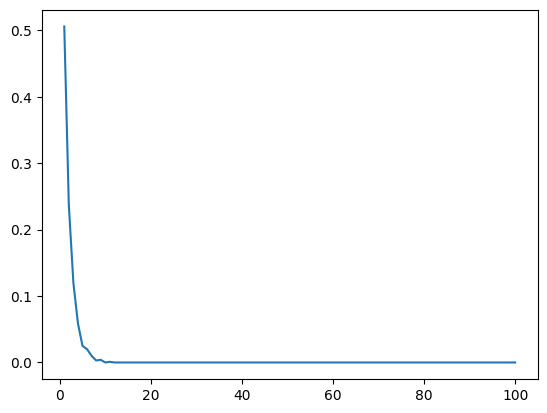

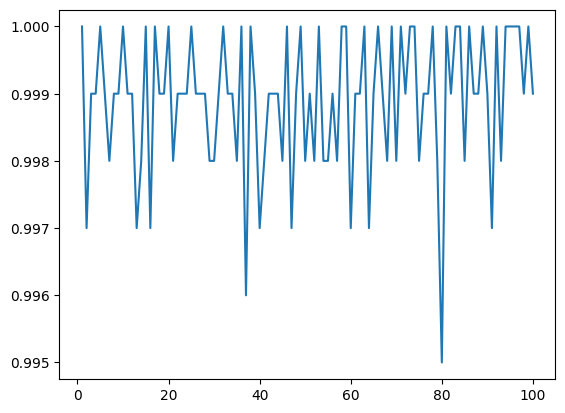

In [4]:
#zadanie 1.3
import numpy as np

def prawdopodobienstwo_bankructwa_jasia(g, j, liczba_gier):
    liczba_bankructw_jasia = 0

    for i in range(liczba_gier):
        wynik = gra2(g, j)
        if wynik == 1:
            liczba_bankructw_jasia += 1
    
    return liczba_bankructw_jasia/liczba_gier

def wykres_bankructwa_jasia(g, liczba_gier):
    jas_wartosci = np.linspace(1, 100, 100)
    prawdop_jasia = [prawdopodobienstwo_bankructwa_jasia(g, jas, liczba_gier) for jas in jas_wartosci]
    
    plt.plot(jas_wartosci, prawdop_jasia)
    plt.show()

def wykres_bankructwa_grzesia(j, liczba_gier):
    grzes_wartosci = np.linspace(1, 100, 100)
    prawdop_grzesia = [prawdopodobienstwo_bankructwa_grzesia(grzes, j, liczba_gier) for grzes in grzes_wartosci]
    
    plt.plot(grzes_wartosci, prawdop_grzesia)
    plt.show()

wykres_bankructwa_jasia(10, 1000)
wykres_bankructwa_grzesia(10, 1000)

In [5]:
#zadanie 1.4
t = 50

def gra3(l_rzutow):
    ciag = ""
    for i in range(l_rzutow):
        wynik = rzut()
        ciag += wynik
        if ciag[-3:] == "OOR":
            return 1 #wygrał Jaś
        elif ciag[-3:] == "ORR":
            return 2 #wygrał Grześ
        elif ciag[-3:] == "RRR":
            return 3 #wygrała Tosia
    return 4 #Gra nierozstrzygnięta

def prawdop_zwyciestwa_tosi(liczba_gier):
    liczba_wygranych_tosi = 0
    for i in range(liczba_gier):
        wynik = gra3(1000)
        if wynik == 3:
            liczba_wygranych_tosi += 1
    return liczba_wygranych_tosi/liczba_gier

print(prawdop_zwyciestwa_tosi(1000))

def gra4(g, j, t):
    
    while g > 0 and j > 0 and t > 0:
        wynik_gry = gra3(1000)
        if wynik_gry == 1:
            g -= 1
            j += 2
            t -= 1
        elif wynik_gry == 2:
            g += 2
            j -= 1
            t -= 1
        elif wynik_gry == 3:
            g -= 1
            j -= 1
            t += 2
    if j == 0:
        return 1 #zbankrutował Jaś
    elif g == 0:
        return 2 #zbankrutował Grześ
    elif t == 0:
        return 3 #zbankrutowałą Tosia

def prawdopodobienstwo_bankructwa_tosi(g, j, t, liczba_gier):
    liczba_bankructw_tosi = 0
    liczba_bankructw_grzesia = 0
    liczba_bankructw_jasia = 0

    for i in range(liczba_gier):
        wynik = gra4(g, j, t)
        if wynik == 1:
            liczba_bankructw_jasia += 1
        elif wynik == 2:
            liczba_bankructw_grzesia += 1
        elif wynik == 3:
            liczba_bankructw_tosi += 1
    
    return liczba_bankructw_tosi/liczba_gier, liczba_bankructw_jasia/liczba_gier, liczba_bankructw_grzesia/liczba_gier

print(prawdopodobienstwo_bankructwa_tosi(g, j, t, liczba_gier))

0.13
(0.794, 0.021, 0.185)


In [6]:
#zadanie 1.5

def gra5(l_rzutow, sekwencja1, sekwencja2):
    ciag = ""
    for i in range(l_rzutow):
        wynik = rzut()
        ciag += wynik
        if ciag[-3:] == sekwencja1:
            return 1 #Wygrana 1
        elif ciag[-3:] == sekwencja2:
            return 2 #Wygrana 2
    return 3 #Gra nierozstrzygnięta

liczba_gier = 1000
def prawdop_gra5(sekwencja1, sekwencja2, liczba_gier):
    liczba_wygranych_2 = 0
    liczba_wygranych_1 = 0

    for i in range(liczba_gier):
        wynik = gra5(1000, sekwencja1, sekwencja2)
        if wynik == 2:
            liczba_wygranych_2 += 1
        elif wynik == 1:
            liczba_wygranych_1 += 1

    return liczba_wygranych_1/liczba_gier, liczba_wygranych_2/liczba_gier

def sprawiedliwa_gra():
    sekwencje = ["OOO", "OOR", "ORR", "RRR", "RRO", "ROO", "ORO", "ROR"]
    sprawiedliwe_sekwencje = []
    for g in sekwencje:
        for j in sekwencje:
            p1, p2 = prawdop_gra5(g, j, 1000)
            if abs(p1 - p2) < 0.01 and (g, j) not in sprawiedliwe_sekwencje and (j, g) not in sprawiedliwe_sekwencje:
                sprawiedliwe_sekwencje.append((g, j))
    return sprawiedliwe_sekwencje

print(sprawiedliwa_gra())


[('OOR', 'OOO'), ('ORR', 'ROR'), ('RRR', 'OOO'), ('RRO', 'RRR'), ('ROO', 'ORR'), ('ROO', 'ORO')]


0.489


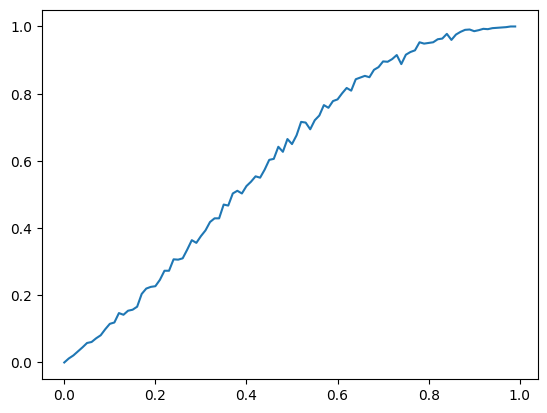

In [7]:
#zadanie 1.7

def rzut2(po):
    x = random.random()
    if x > po:
        return "R"
    else:
        return "O"

def gra6(l_rzutow, po):
    ciag = ""
    for i in range(l_rzutow):
        wynik = rzut2(po)
        ciag += wynik
        if ciag[-3:] == "OOR":
            return 1 #wygrał Jaś
        elif ciag[-3:] == "ORR":
            return 2 #wygrał Grześ
    return 3 #Gra nierozstrzygnięta

liczba_gier = 1000

def prawdop_gra6(liczba_gier, po):
    liczba_wygranych_jasia = 0

    for i in range(liczba_gier):
        wynik = gra6(1000, po)
        if wynik == 1:
            liczba_wygranych_jasia += 1

    return liczba_wygranych_jasia/liczba_gier

print(prawdop_gra6(1000, 0.38))

def wykres_wygranej_jasia(liczba_gier):
    po_wartosci = np.linspace(0, 0.99, 100)
    prawdop_jasia = [prawdop_gra6(liczba_gier, po) for po in po_wartosci]

    plt.plot(po_wartosci, prawdop_jasia)
    plt.show()

wykres_wygranej_jasia(1000)

In [8]:
#zadanie 2.1
from scipy.stats import norm


def demp(X, x):
    n = len(X)
    F = 0
    for i in range(0, n):
        if X[i] <= x:
            F += 1
    return F/n

X = norm.rvs(0, 1, 1000)

demp(X, 0)

0.487

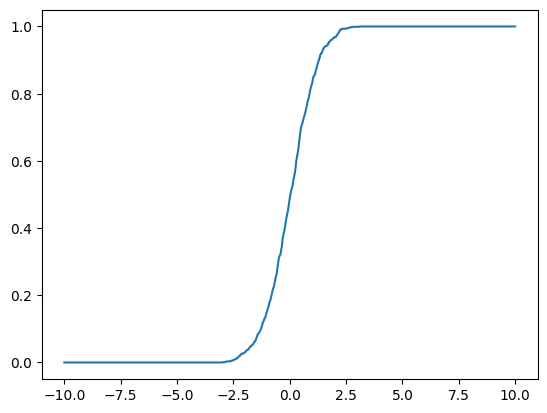

In [9]:
#zadanie 2.2

def drawdemp(X):
    x_wartosci = np.linspace(-10, 10, 1000)
    demp_wartosci = [demp(X, x) for x in x_wartosci]

    plt.plot(x_wartosci, demp_wartosci)
    plt.show()

drawdemp(X)
